<a href="https://colab.research.google.com/github/huangliangc/Scraping_Projects/blob/main/Scraping_Project_1_Hangzhou_Metro.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Scrape a table of Hangzhou Metro Information

### 1. Prepare the soup.

In [ ]:
import requests
import pandas as pd
from bs4 import BeautifulSoup

In [ ]:
url = 'https://zh.m.wikipedia.org/zh/%E6%9D%AD%E5%B7%9E%E5%9C%B0%E9%93%81'

In [ ]:
page = requests.get(url)
page.text

'<!DOCTYPE html>\n<html class="client-nojs" lang="zh" dir="ltr">\n<head>\n<meta charset="UTF-8"/>\n<title>杭州地铁 - 维基百科，自由的百科全书</title>\n<script>document.documentElement.className="client-js";RLCONF={"wgBreakFrames":false,"wgSeparatorTransformTable":["",""],"wgDigitTransformTable":["",""],"wgDefaultDateFormat":"zh","wgMonthNames":["","1月","2月","3月","4月","5月","6月","7月","8月","9月","10月","11月","12月"],"wgRequestId":"0d7429b6-26c3-4870-8c97-be4d8dcfc2b6","wgCSPNonce":false,"wgCanonicalNamespace":"","wgCanonicalSpecialPageName":false,"wgNamespaceNumber":0,"wgPageName":"杭州地铁","wgTitle":"杭州地铁","wgCurRevisionId":75105557,"wgRevisionId":75105557,"wgArticleId":403660,"wgIsArticle":true,"wgIsRedirect":false,"wgAction":"view","wgUserName":null,"wgUserGroups":["*"],"wgPageContentLanguage":"zh","wgPageContentModel":"wikitext","wgRelevantPageName":"杭州地铁","wgRelevantArticleId":403660,"wgUserVariant":"zh","wgIsProbablyEditable":true,"wgRelevantPageIsProbablyEditable":true,"wgRestrictionEdit":[],"wgRestrict

In [ ]:
soup = BeautifulSoup(page.text, 'lxml')

### 2. Find the table information.

In [ ]:
table = soup.find('table', class_ = 'wikitable')

In [ ]:
route = table.find_all('th')
route

[<th colspan="2">线路名称
 </th>, <th>首段开通日期
 </th>, <th>最近延伸日期
 </th>, <th colspan="2">起点站／终点站
 </th>, <th>车站数目
 </th>, <th>运营长度<br/>（公里）
 </th>, <th><a class="mw-redirect" href="/wiki/%E5%9C%B0%E9%93%81%E8%BD%A6%E5%9E%8B#%E4%B8%AD%E5%9B%BD%E5%A4%A7%E9%99%86" title="地铁车型">车型</a>编组
 </th>, <th>峰值车速
 </th>, <th>配车数量
 </th>, <th>车辆段 / 停车场
 </th>, <th>运营单位
 </th>, <th><a href="/wiki/%E6%9D%AD%E5%B7%9E%E5%9C%B0%E9%93%811%E5%8F%B7%E7%BA%BF" title="杭州地铁1号线">1号线</a>
 </th>, <th><a href="/wiki/%E6%9D%AD%E5%B7%9E%E5%9C%B0%E9%93%812%E5%8F%B7%E7%BA%BF" title="杭州地铁2号线">2号线</a>
 </th>, <th rowspan="2"><a href="/wiki/%E6%9D%AD%E5%B7%9E%E5%9C%B0%E9%93%813%E5%8F%B7%E7%BA%BF" title="杭州地铁3号线">3号线</a>
 </th>, <th><a href="/wiki/%E6%9D%AD%E5%B7%9E%E5%9C%B0%E9%93%814%E5%8F%B7%E7%BA%BF" title="杭州地铁4号线">4号线</a>
 </th>, <th><a href="/wiki/%E6%9D%AD%E5%B7%9E%E5%9C%B0%E9%93%815%E5%8F%B7%E7%BA%BF" title="杭州地铁5号线">5号线</a>
 </th>, <th rowspan="2"><a href="/wiki/%E6%9D%AD%E5%B7%9E%E5%9C%B0%E9%93%816%E5%8F%B7%E7%BA%BF" 

### 3. Find the column names, and split column `'起点站/终点站'` into two columns.

In [ ]:
column_list = []
for i in route:
  if "号线" not in i.text:
    column2 = i.text.replace('\n', '')
    column_list.append(column2)

column_list[3] = '起点站'
column_list.insert(4, '终点站')


In [ ]:
column_list

['线路名称',
 '首段开通日期',
 '最近延伸日期',
 '起点站',
 '终点站',
 '车站数目',
 '运营长度（公里）',
 '车型编组',
 '峰值车速',
 '配车数量',
 '车辆段 / 停车场',
 '运营单位']

### 4. Find the table information

#### Note that `route` has names of `'th'`, and `info` has names of `'td'`.

In [ ]:
route_list = []
for i in route:
  if "号线" in i.text:
    column2 = i.text.replace('\n', '')
    route_list.append(column2)

route_list[3] = '起点站'
route_list.insert(4, '终点站')

Find the number of rows by getting the number of routes.

In [ ]:
route_list

['1号线',
 '2号线',
 '3号线',
 '起点站',
 '终点站',
 '5号线',
 '6号线',
 '7号线',
 '8号线',
 '9号线',
 '10号线',
 '16号线',
 '19号线']

In [ ]:
len(route_list)

13

In [ ]:
all_the_rows = []
for i in range(2, len(route_list) + 3):

  route = table.find_all('tr')[i].find_all('th')
  info = table.find_all('tr')[i].find_all('td')

  list_of_row = []

  for j in route:
    route_2 = j.text.replace('\n', '')
    list_of_row.append(route_2)

    for k in info:
      info_2 = k.text.replace('\n', '')
      if info_2 == '':
        continue
      list_of_row.append(info_2)

  if list_of_row == []:
    continue
  else:
    all_the_rows.append(list_of_row)

In [ ]:
all_the_rows

[['1号线',
  '2012年11月24日',
  '2020年12月30日',
  '湘湖',
  '萧山国际机场',
  '33',
  '53.07',
  '6B',
  '80km/h',
  '80列',
  '七堡车辆段湘湖停车场南阳停车场',
  '杭港公司'],
 ['2号线',
  '2014年11月24日',
  '2017年12月27日',
  '朝阳',
  '良渚',
  '33',
  '42.82',
  '6B鼓形车',
  '80km/h',
  '66列',
  '蜀山车辆段双桥停车场',
  '运营公司（客运一公司）'],
 ['3号线',
  '2022年2月21日',
  '2022年9月22日',
  '吴山前村',
  '星桥',
  '37[注 1]',
  '56',
  '6AH',
  '80km/h',
  '78列',
  '星桥车辆段小和山停车场仓前停车场',
  '运营公司（客运二公司）'],
 ['4号线',
  '2015年2月2日',
  '2022年2月21日',
  '浦沿',
  '池华街',
  '32[注 2]',
  '47',
  '6B鼓形车',
  '80km/h',
  '61列',
  '七堡停车场勾庄车辆段',
  '运营公司（客运一公司）'],
 ['5号线',
  '2019年6月24日',
  '2020年4月23日',
  '金星',
  '姑娘桥',
  '39',
  '53.92',
  '6AH',
  '80km/h',
  '61列',
  '五常车辆基地姑娘桥停车场',
  '杭港公司'],
 ['6号线',
  '2020年12月30日',
  '2021年11月6日',
  '桂花西路',
  '枸桔弄',
  '34[注 3]',
  '58.3',
  '6AH',
  '100km/h',
  '54列',
  '双浦车辆段丰北停车场',
  '运营公司（客运二公司）'],
 ['7号线',
  '2020年12月30日',
  '2022年4月1日',
  '吴山广场',
  '江东二路',
  '24',
  '47.63',
  '6A',
  '100km/h',
  '34列',
  '盈中车辆段江东三路停车场',
  '运营公

Discard all the `'注'` and `'列'`.

In [ ]:
for i in all_the_rows:
  for j in range(len(i)):
    if '注' in i[j]:
      i[j] = i[j].replace(i[j][-5:], '')

    if '列' in i[j]:
      i[j] = i[j].replace(i[j][-1:], '')

    if i[j] == '-':
      i[j] = '暂未开通'


Get a dataframe.

In [ ]:
df = pd.DataFrame(all_the_rows, columns = column_list)
df["车站数目"] = df["车站数目"].astype(int)
df["运营长度（公里）"] = df["运营长度（公里）"].astype(float)
df["配车数量"] = df["配车数量"].astype(int)
df

,线路名称,首段开通日期,最近延伸日期,起点站,终点站,车站数目,运营长度（公里）,车型编组,峰值车速,配车数量,车辆段 / 停车场,运营单位
0,1号线,2012年11月24日,2020年12月30日,湘湖,萧山国际机场,33,53.07,6B,80km/h,80,七堡车辆段湘湖停车场南阳停车场,杭港公司
1,2号线,2014年11月24日,2017年12月27日,朝阳,良渚,33,42.82,6B鼓形车,80km/h,66,蜀山车辆段双桥停车场,运营公司（客运一公司）
2,3号线,2022年2月21日,2022年9月22日,吴山前村,星桥,37,56.00,6AH,80km/h,78,星桥车辆段小和山停车场仓前停车场,运营公司（客运二公司）
3,4号线,2015年2月2日,2022年2月21日,浦沿,池华街,32,47.00,6B鼓形车,80km/h,61,七堡停车场勾庄车辆段,运营公司（客运一公司）
4,5号线,2019年6月24日,2020年4月23日,金星,姑娘桥,39,53.92,6AH,80km/h,61,五常车辆基地姑娘桥停车场,杭港公司
5,6号线,2020年12月30日,2021年11月6日,桂花西路,枸桔弄,34,58.30,6AH,100km/h,54,双浦车辆段丰北停车场,运营公司（客运二公司）
6,7号线,2020年12月30日,2022年4月1日,吴山广场,江东二路,24,47.63,6A,100km/h,34,盈中车辆段江东三路停车场,运营公司（客运三公司）
7,8号线,2021年6月28日,暂未开通,文海南路,新湾路,9,17.17,6A,100km/h,11,新湾车辆段,运营公司（客运三公司）
8,9号线,2021年7月10日,2022年4月1日,观音塘,龙安,21,29.53,6B鼓形车,80km/h,31,昌达路车辆段,运营公司（客运一公司）
9,10号线,2022年2月21日,2022年9月22日,黄龙体育中心,逸盛路,11,13.40,6A,80km/h,16,仁和车辆段,运营公司（客运三公司）


In [ ]:
import seaborn as sns
from sklearn.linear_model import LinearRegression

sns.set(rc={'figure.figsize':(11.7,8.27)})

[Text(0, 0.5, 'Operating Length (km)'), Text(0.5, 0, 'Number of Stations')]

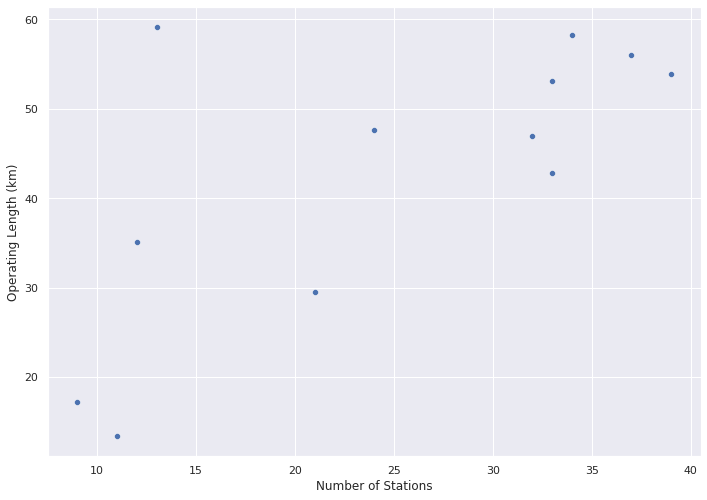

In [ ]:
vis = sns.scatterplot(x = '车站数目', y = '运营长度（公里）', data = df)
vis.set(xlabel='Number of Stations', ylabel='Operating Length (km)')

[Text(0, 0.5, 'Operating Length (km)'), Text(0.5, 0, 'Number of Stations')]

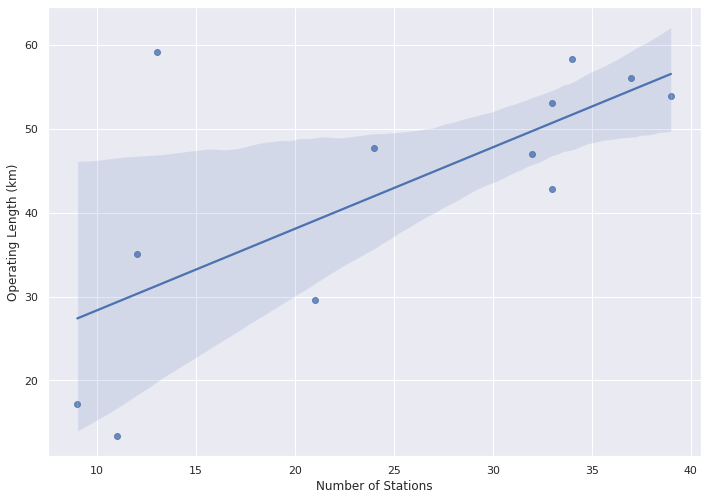

In [ ]:
vis = sns.regplot(x = '车站数目', y = '运营长度（公里）', data = df)
vis.set(xlabel='Number of Stations', ylabel='Operating Length (km)')

In [ ]:
model = LinearRegression()
x = df[['车站数目']] 
y = df[['运营长度（公里）']]
model.fit(x, y)
print(model.intercept_, model.coef_, model.score(x, y))

[18.6586603] [[0.97045663]] 0.4798382293674528


In [ ]:
#OLS(y, x)

OLS(df['运营长度（公里）'],df['车站数目']).fit().summary()

/usr/local/lib/python3.8/dist-packages/scipy/stats/stats.py:1541: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=12
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:               运营长度（公里）   R-squared (uncentered):                   0.916
Model:                            OLS   Adj. R-squared (uncentered):              0.909
Method:                 Least Squares   F-statistic:                              120.3
Date:                Wed, 28 Dec 2022   Prob (F-statistic):                    2.92e-07
Time:                        16:11:55   Log-Likelihood:                         -47.915
No. Observations:                  12   AIC:                                      97.83
Df Residuals:                      11   BIC:                                      98.32
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
车站数目           1.6037      0.146     10.968      0.000       1.282       1.926
==============================================================================
Omnibus:                       13.189   Durbin-Watson:                   0.653
Prob(Omnibus):                  0.001   Jarque-Bera (JB):                7.762
Skew:                           1.654   Prob(JB):                       0.0206
Kurtosis:                       5.141   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

[Text(0, 0.5, 'Number of Cars'), Text(0.5, 0, 'Number of Stations')]

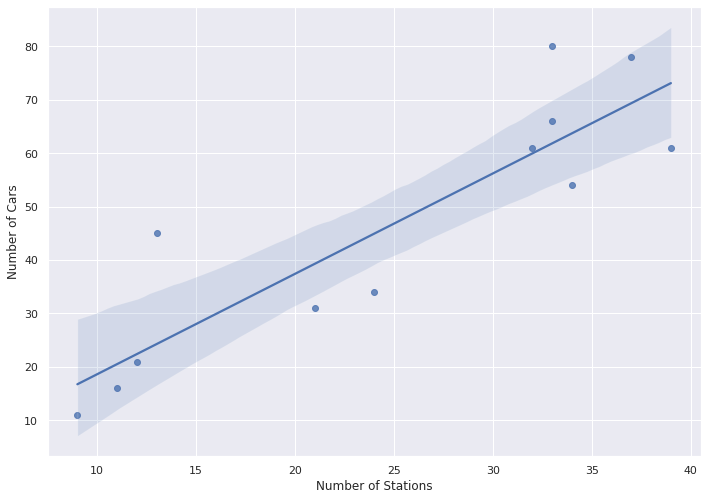

In [ ]:
vis = sns.regplot(x = '车站数目', y = '配车数量', data = df)
vis.set(xlabel='Number of Stations', ylabel='Number of Cars')

In [ ]:
model = LinearRegression()
x = df[['车站数目']] 
y = df[['配车数量']]
model.fit(x, y)
print(model.intercept_, model.coef_, model.score(x, y))

[-0.17274704] [[1.87943948]] 0.7846379917571367


In [ ]:
from statsmodels.api import OLS

#OLS(y, x)

OLS(df['配车数量'],df['车站数目']).fit().summary()

/usr/local/lib/python3.8/dist-packages/scipy/stats/stats.py:1541: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=12
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                   配车数量   R-squared (uncentered):                   0.958
Model:                            OLS   Adj. R-squared (uncentered):              0.955
Method:                 Least Squares   F-statistic:                              253.4
Date:                Wed, 28 Dec 2022   Prob (F-statistic):                    6.08e-09
Time:                        16:08:13   Log-Likelihood:                         -45.310
No. Observations:                  12   AIC:                                      92.62
Df Residuals:                      11   BIC:                                      93.10
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
车站数目           1.8736      0.118     15.920      0.000       1.615       2.133
==============================================================================
Omnibus:                        1.959   Durbin-Watson:                   0.747
Prob(Omnibus):                  0.376   Jarque-Bera (JB):                1.379
Skew:                           0.762   Prob(JB):                        0.502
Kurtosis:                       2.339   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""